In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as stats

credit = pd.read_csv("Credit.csv", index_col=0)
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


### Bivariate Analysis
Analisis Bi-variate menemukan hubungan antara dua variabel. Di sini, kita mencari hubungan dan disasosiasi antara variabel pada tingkat signifikansi yang ditentukan sebelumnya. Kita dapat melakukan analisis bivariat untuk setiap kombinasi variabel kategori dan numerik.

* Numerik & numerik
* Kategorik & Kategorik
* Kategorik & numerik

### Numerik & Numerik

Untuk mengetahui apakah ada hubungan antara 2 variabel numerik digunakan **scatter plot**. Dari scatter plot dapat dilihat hubungan 2 variabel: tidak berkorelasi, berkorelasi positip, atau berkorelasi negatip. 

Untuk melihat seberapa kuat korelasi antar 2 variabel digunakan nilai koefisien korelasi (r). Jika koefisien korelasi r:
* r > 0: berkorelasi positip
* r = 0: tidak berkorelasi
* r < 0: berkorelasi negatip


In [2]:
#cek missing values
credit.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

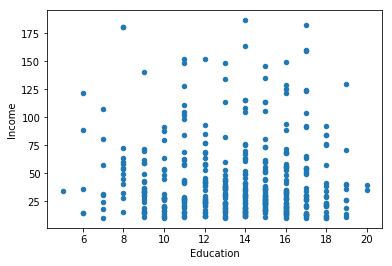

In [3]:
# Scatter plot antara variabel 'Education' dan 'Income'
credit.plot.scatter(x='Education', y='Income')

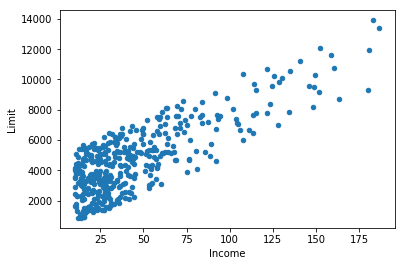

In [4]:
# Scatter plot antara variabel 'Income' dan 'Limit'
credit.plot.scatter(x='Income', y='Limit')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B28D990>,
      dtype=object)

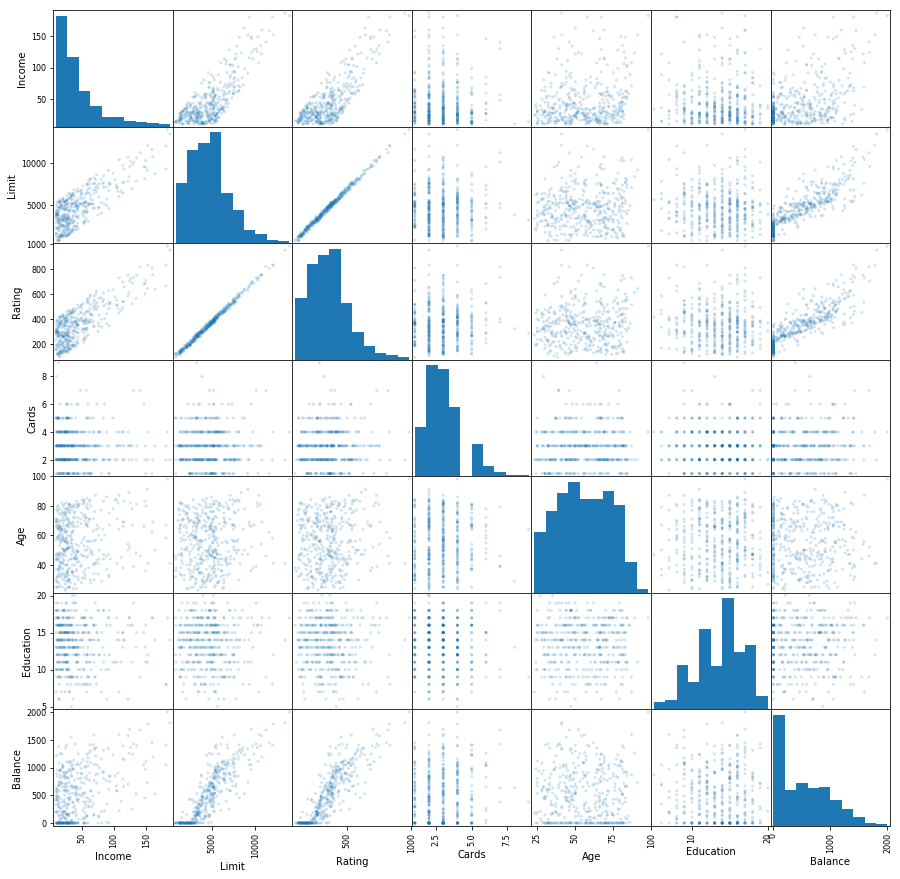

In [6]:
# Membuat matrix scatter plot antar variabel numerik yang ada dalam DataFrame
pd.plotting.scatter_matrix(credit, alpha=0.2, figsize=(15,15))

In [7]:
credit.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


### Kategorik & Kategorik:

Untuk menentukan hubungan antara 2 variabel kategorik digunakan metode berikut:

* **Two-way table**: Baris merupakan nilai dari satu variabel dan kolom merupakan nilai dari variabel yang lain. 
* **Stacked Column Chart**: Merupakan visualisasi dari 2-way table.
* **Chi-Square Test**: Untuk menentukan seberapa signifikan hubungan antara 2 variabel kategorik.


### Two-way table

In [8]:
# Membuat two-way table antar variabel 'Gender' dan 'Student'
pd.crosstab(credit.Gender, credit.Student, margins = True)

Student,No,Yes,All
Gender,,,
Male,177,16,193
Female,183,24,207
All,360,40,400


### Stack column chart

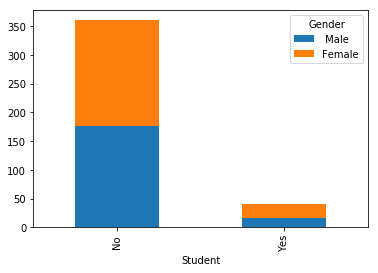

In [9]:
# Membuat Stack Column Chart dari two-way table
temp = pd.crosstab(credit.Student, credit.Gender)
temp.plot.bar(stacked=True)

### Chi-square test

In [10]:
student_tab = pd.crosstab(credit.Student, credit.Gender, margins = True)
student_tab

Gender,Male,Female,All
Student,,,
No,177,183,360
Yes,16,24,40
All,193,207,400


In [11]:
# membuat matrix observed
student_tab.columns = ["Male","Female","row_totals"]

student_tab.index = ["No","Yes","col_totals"]

observed = student_tab.iloc[0:2,0:2]   # Get table without totals for later use
observed

,Male,Female
No,177,183
Yes,16,24


In [12]:
# Membuat matrix expected
expected =  np.outer(student_tab["row_totals"][0:2],
                     student_tab.loc["col_totals"][0:2]) / 400

expected = pd.DataFrame(expected)

expected.columns = ["Male","Female"]
expected.index = ["No","Yes"]

expected

,Male,Female
No,173.7,186.3
Yes,19.3,20.7


In [13]:
# Hitung chi-square statistik
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

1.2114840679832808


In [14]:
# Hitung critical value
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.841458820694124
P value
0.27103840508046706


Karena nilai dari chi_squared_stat < Critical value, make kedua variabel independent (tidak berkorelasi).

In [15]:
# Cara lain: menggunakan package stats
stats.chi2_contingency(observed= observed)

(0.872179531036632, 0.35035262821662183, 1, array([[173.7, 186.3],
        [ 19.3,  20.7]]))

Arti dari output:
chi-square statistic = 0.872
the p-value = 0.3
the degrees of freedom = 1 
the expected counts.

## Latihan

In [16]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['infantry', 'infantry', 'cavalry', 'cavalry', 'infantry', 'infantry', 'cavalry', 'cavalry','infantry', 'infantry', 'cavalry', 'cavalry'], 
        'experience': ['veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie','veteran', 'rookie', 'veteran', 'rookie'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'experience', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,experience,name,preTestScore,postTestScore
0,Nighthawks,infantry,veteran,Miller,4,25
1,Nighthawks,infantry,rookie,Jacobson,24,94
2,Nighthawks,cavalry,veteran,Ali,31,57
3,Nighthawks,cavalry,rookie,Milner,2,62
4,Dragoons,infantry,veteran,Cooze,3,70
5,Dragoons,infantry,rookie,Jacon,4,25
6,Dragoons,cavalry,veteran,Ryaner,24,94
7,Dragoons,cavalry,rookie,Sone,31,57
8,Scouts,infantry,veteran,Sloan,2,62
9,Scouts,infantry,rookie,Piger,3,70


In [20]:
df.preTestScore

0      4
1     24
2     31
3      2
4      3
5      4
6     24
7     31
8      2
9      3
10     2
11     3
Name: preTestScore, dtype: int64

In [21]:
df.postTestScore

0     25
1     94
2     57
3     62
4     70
5     25
6     94
7     57
8     62
9     70
10    62
11    70
Name: postTestScore, dtype: int64

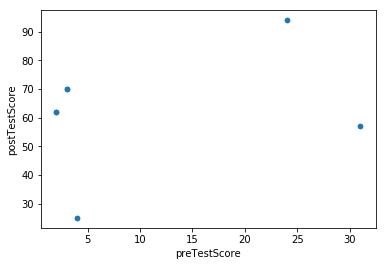

In [22]:
df.plot.scatter(x='preTestScore', y='postTestScore')

In [23]:
df1 = pd.DataFrame(raw_data, columns = ['preTestScore', 'postTestScore'])

In [24]:
df1

,preTestScore,postTestScore
0,4,25
1,24,94
2,31,57
3,2,62
4,3,70
5,4,25
6,24,94
7,31,57
8,2,62
9,3,70


In [25]:
df1.corr()

,preTestScore,postTestScore
preTestScore,1.000000,0.330443
postTestScore,0.330443,1.000000


In [26]:
pd.crosstab(df.regiment, df.experience, margins = True)

experience,rookie,veteran,All
regiment,,,
Dragoons,2,2,4
Nighthawks,2,2,4
Scouts,2,2,4
All,6,6,12


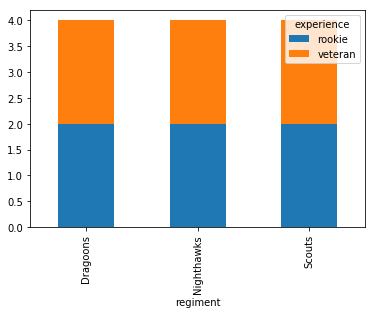

In [27]:
# Membuat Stack Column Chart dari two-way table
temp1 = pd.crosstab(df.regiment, df.experience)
temp1.plot.bar(stacked=True)

In [33]:
experience = pd.crosstab(df.regiment, df.experience, margins = True)

In [36]:
# membuat matrix observed
experience.columns = ["rookie","veteran","row_totals"]

experience.index = ["Dragoons","Nighthawks","Scouts","col_totals"]

observed1 = experience.iloc[0:2,0:3]   # Get table without totals for later use
observed1

,rookie,veteran,row_totals
Dragoons,2,2,4
Nighthawks,2,2,4


In [37]:
stats.chi2_contingency(observed = observed1)

(0.0, 1.0, 2, array([[2., 2., 4.],
        [2., 2., 4.]]))

### Regresi Linier

In [45]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as stats
from sklearn import linear_model

credit = pd.read_csv("Credit.csv", index_col=0)
credit.head(3)
 
X = credit['Income']
Y = credit['Limit']

X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

In [47]:
X, Y

(array([[ 14.891],
        [106.025],
        [104.593],
        [148.924],
        [ 55.882],
        [ 80.18 ],
        [ 20.996],
        [ 71.408],
        [ 15.125],
        [ 71.061],
        [ 63.095],
        [ 15.045],
        [ 80.616],
        [ 43.682],
        [ 19.144],
        [ 20.089],
        [ 53.598],
        [ 36.496],
        [ 49.57 ],
        [ 42.079],
        [ 17.7  ],
        [ 37.348],
        [ 20.103],
        [ 64.027],
        [ 10.742],
        [ 14.09 ],
        [ 42.471],
        [ 32.793],
        [186.634],
        [ 26.813],
        [ 34.142],
        [ 28.941],
        [134.181],
        [ 31.367],
        [ 20.15 ],
        [ 23.35 ],
        [ 62.413],
        [ 30.007],
        [ 11.795],
        [ 13.647],
        [ 34.95 ],
        [113.659],
        [ 44.158],
        [ 36.929],
        [ 31.861],
        [ 77.38 ],
        [ 19.531],
        [ 44.646],
        [ 44.522],
        [ 43.479],
        [ 36.362],
        [ 39.705],
        [ 44

In [48]:
# Split data menjadi training/testing sets
X_train = X[:-150]
X_test = X[-150:]
 
# Split targets menjadi training/testing sets
Y_train = Y[:-150]
Y_test = Y[-150:]
X_train.shape

(250, 1)

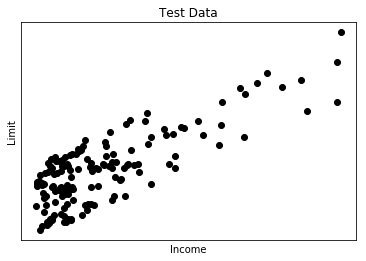

In [49]:
# Scatter plot
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('Income')
plt.ylabel('Limit')
plt.xticks(())
plt.yticks(())
 
plt.show()

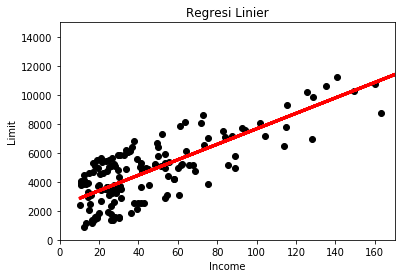

In [50]:
# Membuat obyek regresi linear
regr = linear_model.LinearRegression()
 
# Train model menggunakan training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Regresi Linier')
plt.xlabel('Income')
plt.ylabel('Limit')

plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
plt.axis([0, 170, 0, 15000])
plt.show()

In [51]:
print(regr.predict(150))

[[10325.25739161]]


In [52]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as stats
from sklearn import linear_model

credit = pd.read_csv("Credit.csv", index_col=0)
credit.head(3)
 
X1 = credit['Balance']
Y1 = credit['Limit']

X1=X1.values.reshape(len(X),1)
Y1=Y1.values.reshape(len(Y),1)

In [54]:
len(X1)

400

In [56]:
# Split data menjadi training/testing sets
X1_train = X1[:-150]
X1_test = X1[-150:]
 
# Split targets menjadi training/testing sets
Y1_train = Y1[:-150]
Y1_test = Y1[-150:]
X1_train.shape

(250, 1)

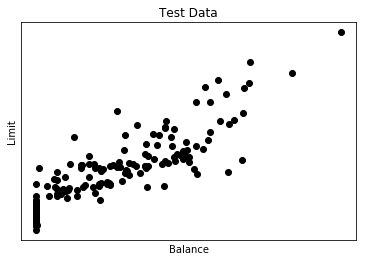

In [58]:
# Scatter plot
plt.scatter(X1_test, Y1_test,  color='black')
plt.title('Test Data')
plt.xlabel('Balance')
plt.ylabel('Limit')
plt.xticks(())
plt.yticks(())
 
plt.show()

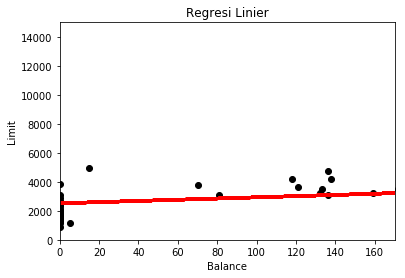

In [59]:
# Membuat obyek regresi linear
regr = linear_model.LinearRegression()
 
# Train model menggunakan training sets
regr.fit(X1_train, Y1_train)
 
# Plot outputs
plt.scatter(X1_test, Y1_test,  color='black')
plt.title('Regresi Linier')
plt.xlabel('Balance')
plt.ylabel('Limit')

plt.plot(X1_test, regr.predict(X1_test), color='red',linewidth=3)
plt.axis([0, 170, 0, 15000])
plt.show()

In [60]:
print(regr.predict(150))

[[3137.66610121]]
